# Friends Analysis

Team3 - Han Chen and Dylan Connor


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


## Data Wrangling

In [2]:
#Read user data
user = pd.read_csv("input_data/yelp_user.csv", usecols = ['user_id','friends','review_count'])

In [3]:
#View user data
user.head()

,user_id,review_count,friends
0,JJ-aSuM4pCFPdkfoZ34q0Q,10,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg..."
1,uUzsFQn_6cXDh6rPNGbIFA,1,None
2,mBneaEEH5EMyxaVyqS-72A,6,None
3,W5mJGs-dcDWRGEhAzUYtoA,3,None
4,4E8--zUZO1Rr1IBK4_83fg,11,None


In [4]:
#Limit to people with friends
user = user.loc[user['friends']!="None"]

In [5]:
#See user shape
user.shape

(760007, 3)

In [6]:
user.head()

,user_id,review_count,friends
0,JJ-aSuM4pCFPdkfoZ34q0Q,10,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg..."
17,h5ERTYn2vQ1QbjTZvfWPaA,3,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag..."
18,jYnkJR3T8yCERXywoVhWYA,48,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw..."
44,fV8Yr0c5tFQTQ2SRRJHXHw,50,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A..."
74,aw973Pm1nrTbRjP4zY9B9g,762,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ..."


In [7]:
#Read in review data
reviews = pd.read_csv("input_data/yelp_review.csv", usecols = ['user_id','business_id','stars', 'date'])

In [8]:
reviews.head()

,user_id,business_id,stars,date
0,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28
1,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28
2,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28
3,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28
4,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28


In [9]:
reviews.shape

(5261668, 4)

In [10]:
#Merge review and user data
reviews = pd.merge(reviews, user)

In [11]:
reviews.shape

(3927721, 6)

## Analysis

In [12]:
#Create a friends dictionary which has each person as a key and all friends in a list as a value
friends = {}
for i,j in zip(user['user_id'].values,user['friends'].values):
    friends[i] = j.split(", ")

In [13]:
#Create a review dictionary which has each person as a key and a dictionary of business with list of review and date as the value
reviews_dict = {}
for i,j,k,l in zip(reviews['user_id'].values,reviews['business_id'].values, reviews['stars'].values, reviews['date'].values):
    if reviews_dict.get(i) is None:
        reviews_dict[i] = {j : [k,l]}
    else:
        reviews_dict[i][j] = [k,l]

In [14]:
reviews_dict.get('bv2nCi5Qv5vroFiqKGopiw')

{'ACFtxLv8pGrrxMm6EgjreA': [4, '2016-05-28'],
 'AEx2SYEUJmTxVVB18LlCwA': [5, '2016-05-28'],
 'CKC0-MOWMqoeWf6s-szl8g': [5, '2016-05-28'],
 'VR6GpWIda3SfvPC-lg9H3w': [5, '2016-05-28'],
 's2I_Ni76bjJNK9yG60iD-Q': [4, '2016-05-28']}

In [15]:
#Create a table that pulls together people that are friends and have rated the same business
compares = []

#For each person with reviews
for review_key in reviews_dict.keys():
    keys = reviews_dict[review_key].keys()
    if keys is None: continue
    
    #For each review of the person
    for rest_key in keys:
        #friends.get(review_key)
        if keys is None: continue
        
        #For each friend of that person
        for k in friends.get(review_key):
            
            #Get the friend's reviews
            friend_review = reviews_dict.get(k)
            
            #If friend has reviews
            if friend_review != None:
                
                match = friend_review.get(rest_key)
             
                #If friend reviewed, then add a row to compares 
                if match != None:
                    compares.append([review_key, rest_key, reviews_dict[review_key].get(rest_key), k, match]) 

In [16]:
compares[0:5]

[['u0LXt3Uea_GidxRW1xcsfg',
  '5r6-G9C4YLbC7Ziz57l3rQ',
  [3, '2013-02-09'],
  'Q9mA60HnY87C1TW5kjAZ6Q',
  [3, '2012-08-30']],
 ['u0LXt3Uea_GidxRW1xcsfg',
  'RtUvSWO_UZ8V3Wpj0n077w',
  [3, '2012-12-03'],
  'G-6X-llgA_qAxGxocykHzQ',
  [3, '2017-02-09']],
 ['u0LXt3Uea_GidxRW1xcsfg',
  'RtUvSWO_UZ8V3Wpj0n077w',
  [3, '2012-12-03'],
  'Q9mA60HnY87C1TW5kjAZ6Q',
  [3, '2014-04-07']],
 ['u0LXt3Uea_GidxRW1xcsfg',
  'RtUvSWO_UZ8V3Wpj0n077w',
  [3, '2012-12-03'],
  'l1YPTobYrKB0ZsCdZ0Qrtg',
  [4, '2014-10-21']],
 ['u0LXt3Uea_GidxRW1xcsfg',
  'PFPUMF38-lraKzLcTiz5gQ',
  [3, '2010-09-15'],
  'Q9mA60HnY87C1TW5kjAZ6Q',
  [4, '2012-01-23']]]

In [17]:
#Date difference function
from datetime import datetime
def date_diff(date_first, date_second):
    date_first = datetime.strptime(date_first, "%Y-%m-%d")
    date_second = datetime.strptime(date_second, "%Y-%m-%d")
    return abs((date_second - date_first).days)

In [18]:
#Get date differences for raters
distances = [date_diff(i[2][1],i[4][1]) for i in compares]

In [30]:
sum([1 for i in distances if i == 2])

19996

Text(0.5,1,'Count of Friends Reviewing the Same Restaurant')

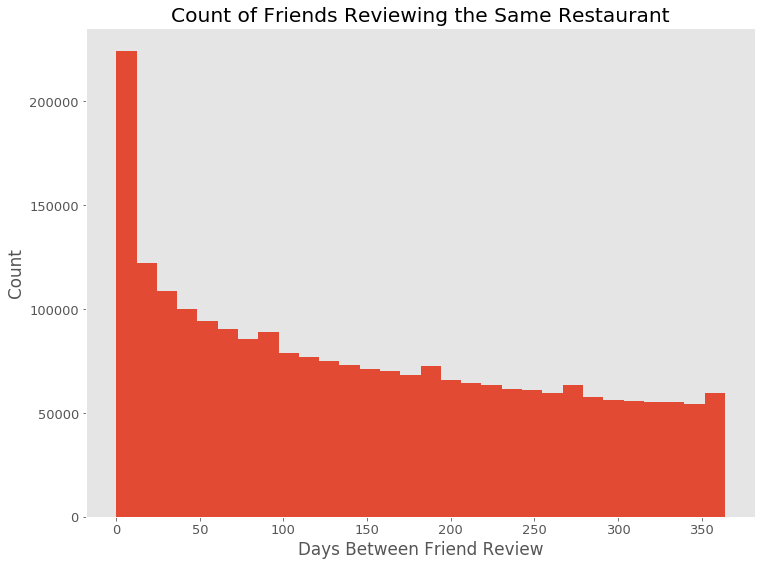

In [31]:
#Histogram of friend's ratings broken out into date difference buckets
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})
plt.pyplot.figure(figsize = (12,9))
plt.pyplot.grid()
plt.pyplot.xlabel("Days Between Friend Review")
plt.pyplot.ylabel("Count")
plt.pyplot.tick_params(axis='both', which='major', labelsize=13)
plt.pyplot.tick_params(axis='both', which='minor', labelsize=13)
plt.pyplot.hist([i for i in distances if (i < 365 and i >= 0)],bins = 30)
plt.pyplot.title("Count of Friends Reviewing the Same Restaurant")

Text(0.5,1,'Count of Friends Reviewing the Same Restaurant')

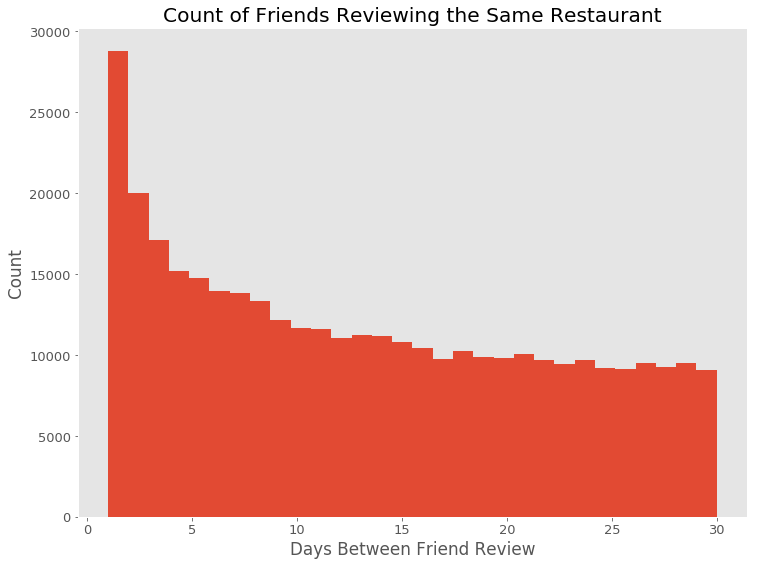

In [20]:
#Histogram of friend's ratings broken out into date difference buckets (zoomed in)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})
plt.pyplot.figure(figsize = (12,9))
plt.pyplot.grid()
plt.pyplot.xlabel("Days Between Friend Review")
plt.pyplot.ylabel("Count")
plt.pyplot.tick_params(axis='both', which='major', labelsize=13)
plt.pyplot.tick_params(axis='both', which='minor', labelsize=13)
plt.pyplot.hist([i for i in distances if (i < 31 and i > -1)],bins = 30)
plt.pyplot.title("Count of Friends Reviewing the Same Restaurant")

In [21]:
#Get date differences and ratings difference for friend's ratings
diff_ratings = [[abs(date_diff(i[2][1],i[4][1])),abs(i[2][0]-i[4][0])] for i in compares]

In [22]:
#Make a dataframe
diff_ratings = pd.DataFrame(diff_ratings, columns = ['days difference','ratings difference'])

In [35]:
diff_ratings.head()

,days difference,ratings difference
0,163,0
1,1529,0
2,490,0
3,687,1
4,495,1


<img src="Visualization/Friends histogram.png">

In [67]:
#Create a benchmark of reviews to compare to

#Create a dictionary of all reviews that hold a dictionary of users reviews with date and time
review_dictionary = {}
for i,j,k in zip(reviews['business_id'].values, reviews['stars'].values, reviews['date'].values):
    if review_dictionary.get(i) is None:
        review_dictionary[i] = [[j,k]]
    else:
        review_dictionary[i].append([j,k])

In [68]:
count = 0
for i, j in review_dictionary.items():
    if count > 2: break
    print(i)
    print(j)
    count+=1

AEx2SYEUJmTxVVB18LlCwA
[[5, '2016-05-28'], [5, '2016-02-22'], [5, '2017-08-08'], [5, '2013-03-29'], [5, '2015-06-20'], [3, '2016-07-26'], [5, '2013-12-30'], [5, '2012-09-22'], [5, '2013-10-29'], [5, '2015-12-21'], [4, '2016-05-28'], [5, '2017-05-31'], [3, '2014-09-15'], [4, '2012-05-17'], [4, '2017-05-25'], [4, '2014-06-21'], [5, '2016-05-24'], [4, '2011-12-29'], [4, '2014-07-28'], [4, '2013-04-19'], [5, '2016-06-13'], [4, '2016-08-04'], [5, '2014-12-30'], [4, '2013-07-10'], [4, '2014-10-22'], [5, '2015-04-26'], [4, '2012-12-29'], [5, '2017-07-13'], [4, '2017-07-17'], [5, '2017-01-27'], [5, '2017-07-10'], [3, '2016-09-04'], [5, '2016-07-13'], [5, '2011-11-17'], [1, '2015-09-02'], [1, '2012-04-17'], [5, '2016-03-28'], [4, '2012-06-20'], [2, '2017-08-05'], [5, '2017-07-29'], [4, '2017-08-31'], [4, '2017-08-18'], [4, '2014-03-18'], [4, '2009-04-15'], [4, '2014-09-25'], [4, '2014-04-01'], [1, '2016-01-02'], [5, '2016-04-05'], [3, '2017-10-03'], [5, '2013-10-19'], [5, '2017-06-17'], [1, '20

In [81]:
#Create a table that pulls together people that are not friends reviewing the same place
all_reviews_dist = []

#For each person with reviews
for i,j in review_dictionary.items():
    count = 0
    for k in j:
        if count != len(j):
            for l in range(count+1, len(j)):
                all_reviews_dist.append([abs(k[0]-j[l][0]),date_diff(k[1], j[l][1])]) 
            count +=1
        

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
    PyErr_CheckSignals()
KeyboardInterrupt


MemoryError: 

In [82]:
print(len(all_reviews_dist))
all_reviews_dist2[0]


41884058


[0, 96]

(array([ 422734.,  397930.,  392724.,  388054.,  383176.,  380966.,
         377024.,  404534.,  371536.,  367576.,  364017.,  360414.,
         359241.,  356642.,  353654.,  379932.,  347560.,  344252.,
         343565.,  339453.,  338778.,  336406.,  362807.,  335164.,
         334097.,  333235.,  330221.,  330817.,  329798.,  358095.]),
 array([   0.        ,   12.13333333,   24.26666667,   36.4       ,
          48.53333333,   60.66666667,   72.8       ,   84.93333333,
          97.06666667,  109.2       ,  121.33333333,  133.46666667,
         145.6       ,  157.73333333,  169.86666667,  182.        ,
         194.13333333,  206.26666667,  218.4       ,  230.53333333,
         242.66666667,  254.8       ,  266.93333333,  279.06666667,
         291.2       ,  303.33333333,  315.46666667,  327.6       ,
         339.73333333,  351.86666667,  364.        ]),
 <a list of 30 Patch objects>)

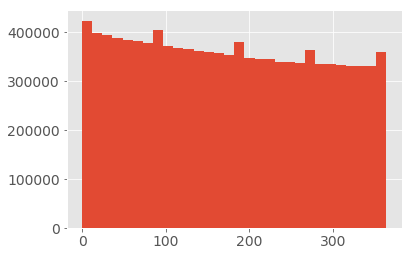

In [85]:
plt.pyplot.hist([i[1] for i in all_reviews_dist if i[1] < 365], bins = 30)

The spike that appears within the friend group does not appear if you look at all reviews

## Export Data

In [36]:
diff_ratings.to_csv("output_data/friends_code.csv")